In [ ]:
import pandas as pd
y_pred = pd.read_csv("path/predictions.txt", delimiter='\t')
scores = pd.read_csv("path/scores.txt", delimiter='\t')
test_df=pd.read_csv('path/test_df.csv')

In [ ]:
y_pred[y_pred == -1] = np.nan
y_pred.columns = [str(i) for i in range(1, 31)]
scores.columns = [str(i) for i in range(1, 31)]
scores.replace([float('-inf')], float('nan'), inplace=True)


,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
0,-77.113892,-82.385521,-19.952787,-69.618195,-79.528488,-53.948128,0.674535,-22.336454,-7.378111,104.141159,...,-90.148911,-87.706612,-68.893105,-41.865234,-58.038200,NaN,NaN,NaN,NaN,NaN
1,-61.594612,-64.734032,-75.001968,-60.243393,-82.599884,-85.891571,-89.765182,-60.602066,103.722992,-91.197166,...,-67.737595,-85.864517,10.384970,-78.475449,-91.458344,-85.846359,3.891736,-88.211426,-75.837151,-75.764786
2,-70.869408,-75.074356,103.269409,24.560591,-35.710037,-6.882389,31.370621,15.125010,-70.952789,15.277156,...,-14.196272,6.851134,-80.494614,-77.628662,NaN,NaN,NaN,NaN,NaN,NaN
3,34.574722,18.002529,20.464928,-59.773331,-68.832771,15.351674,23.696218,-51.864403,3.568534,-73.723022,...,-77.216278,-43.759766,-29.213408,-3.989656,NaN,NaN,NaN,NaN,NaN,NaN
4,103.235687,-62.921715,-87.557732,-67.362381,-75.615517,-73.052261,-47.856590,-64.651527,-83.435806,-53.289238,...,-51.546230,-9.000542,-41.418743,-63.503178,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20638,-35.969803,-79.767303,-80.994247,-78.341614,103.922737,-89.936859,-1.020204,-57.197838,-67.534798,-70.231911,...,-56.745056,-57.657799,-95.806107,-87.534332,NaN,NaN,NaN,NaN,NaN,NaN
20639,100.582108,-77.927841,-68.684799,-21.223452,-77.298401,-82.731293,-58.817215,-48.230377,-79.698135,-54.233719,...,-64.759796,-82.588058,-74.873077,-53.761215,-70.276756,NaN,NaN,NaN,NaN,NaN
20640,-95.025528,-56.876411,-89.687729,-82.484528,-93.039116,9.056068,-87.327896,-98.092560,-91.618927,-80.694160,...,-61.522766,-12.063461,-98.055420,-84.910652,-57.432678,NaN,NaN,NaN,NaN,NaN
20641,-22.297876,-46.293007,-46.616962,-93.888794,-79.840561,-92.253822,103.255783,-71.058594,-26.007292,-88.740540,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
flat_y_pred = y_pred.values.flatten()
flat_scores = scores.values.flatten()
df_ground=test_df[['search_id', 'prop_id','relevance','rank_noad']]

In [ ]:
# append scores to test_df
# Group by search_id
grouped = df_ground.groupby('search_id')

# Create an empty list to store the data
appended_data = []

# Iterate over each group
for name, group in grouped:
    # Append the existing rows
    appended_data.append(group)
    # Calculate the number of missing rows to reach 30
    missing_rows = 30 - len(group)
    if missing_rows > 0:
        # Append missing rows with NaN relevance
        missing_rows_df = pd.DataFrame({
            'search_id': [name] * missing_rows,
            'prop_id': [None] * missing_rows,
            'relevance': [None] * missing_rows
        })
        appended_data.append(missing_rows_df)

# Concatenate the data
df_ground_new = pd.concat(appended_data, ignore_index=True)

In [ ]:
# Count occurences of {0, 1, 2} in y_pred
pred_counts = pd.Series(flat_y_pred).value_counts().reindex([0, 1, 2]).fillna(0)

# Count occurrences of relevance in y_test
test_counts = df_ground['relevance'].value_counts().reindex([0, 1, 2]).fillna(0)

# Print the counts
print("Relevance counts in y_pred:")
print(pred_counts)

print("\nRelevance counts in y_test:")
print(test_counts)

Relevance counts in y_pred:
0    457986
1     30299
2      2418
Name: count, dtype: int64

Relevance counts in y_test:
relevance
0    458011
1     30302
2      2418
Name: count, dtype: int64


In [ ]:
pd.set_option('display.max_columns', None)
import pandas as pd

# Pivoting the DataFrame
pivot_df = pd.pivot_table(df_ground, index='search_id', columns=df_ground.groupby('search_id').cumcount() + 1, values='relevance', aggfunc='first')

# If there are less than 30 columns, pad NaN
if pivot_df.shape[1] < 30:
    pad_columns = range(pivot_df.shape[1] + 1, 31)
    for col in pad_columns:
        pivot_df[col] = pd.NA

# Resetting index
pivot_df.reset_index(drop=True,inplace=True)

#pivot_df=pivot_df.reset_index(drop=True)
pivot_df=pivot_df.iloc[1:].reset_index(drop=True)


In [ ]:
# Get the minimum length of the DataFrame and the list/array
min_length = min(len(df_ground_new), len(flat_scores))
min_length

df_ground_new=df_ground_new.iloc[:min_length]

# Add the 'prop_id' values from the DataFrame to the corresponding elements in flat_y_pred up to the minimum length
df_ground_new['flat_scores'] = flat_scores

In [ ]:
# Group by search_id
grouped = df_ground.groupby('search_id')

# Create an empty list to store the data
appended_data = []

# Iterate over each group
for name, group in grouped:
    # Append the existing rows
    appended_data.append(group)
    # Calculate the number of missing rows to reach 30
    missing_rows = 30 - len(group)
    if missing_rows > 0:
        # Append missing rows with NaN relevance
        missing_rows_df = pd.DataFrame({
            'search_id': [name] * missing_rows,
            'prop_id': [None] * missing_rows,
            'relevance': [None] * missing_rows
        })
        appended_data.append(missing_rows_df)

# Concatenate the data
df_ground_new = pd.concat(appended_data, ignore_index=True)


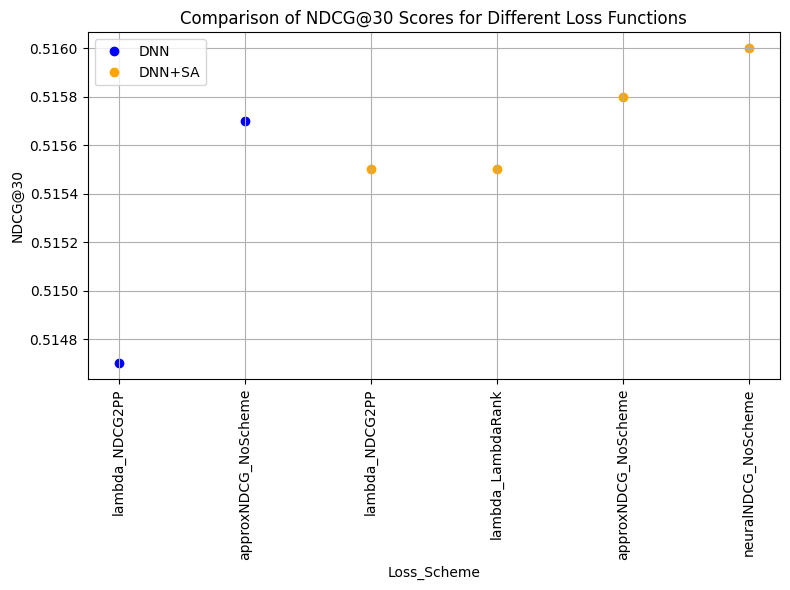

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Provided data
data = {
    'Loss': ['lambda', 'approxNDCG', 'lambda', 'lambda', 'approxNDCG', 'neuralNDCG'],
    'Scheme': ['NDCG2PP', 'NoScheme', 'NDCG2PP', 'LambdaRank', 'NoScheme', 'NoScheme'],
    'Model': ['DNN', 'DNN', 'DNN+SA', 'DNN+SA', 'DNN+SA', 'DNN+SA'],
    'ndcg@30': [0.5147, 0.5157, 0.5155, 0.5155, 0.5158, 0.5160]
}

# Create DataFrame
df = pd.DataFrame(data)

# Set 'Loss' and 'Scheme' as separate columns
df['Loss_Scheme'] = df['Loss'] + '_' + df['Scheme']
df.drop(['Loss', 'Scheme'], axis=1, inplace=True)

# Define colors for 'DNN' and 'DNN+SA'
colors = {'DNN': 'blue', 'DNN+SA': 'orange'}

# Plotting
plt.figure(figsize=(8, 6))  # Adjust figure size here

# Plot NDCG@30 for all models
for i, row in df.iterrows():
    plt.scatter(i, row['ndcg@30'], color=colors[row['Model']])

plt.xlabel('Loss_Scheme')
plt.ylabel('NDCG@30')
plt.title('Comparison of NDCG@30 Scores for Different Loss Functions')

# Create custom legend
handles = [plt.Line2D([0], [0], marker='o', color=color, label=model, linestyle='') for model, color in colors.items()]
plt.legend(handles=handles)

plt.grid(True)
plt.xticks(df.index, df['Loss_Scheme'], rotation=90)  # Increase rotation angle here
plt.tight_layout()
plt.gca().set_facecolor('white')
# Save plot as .png
plt.savefig('validation_ndcg_plot.png')
plt.show()


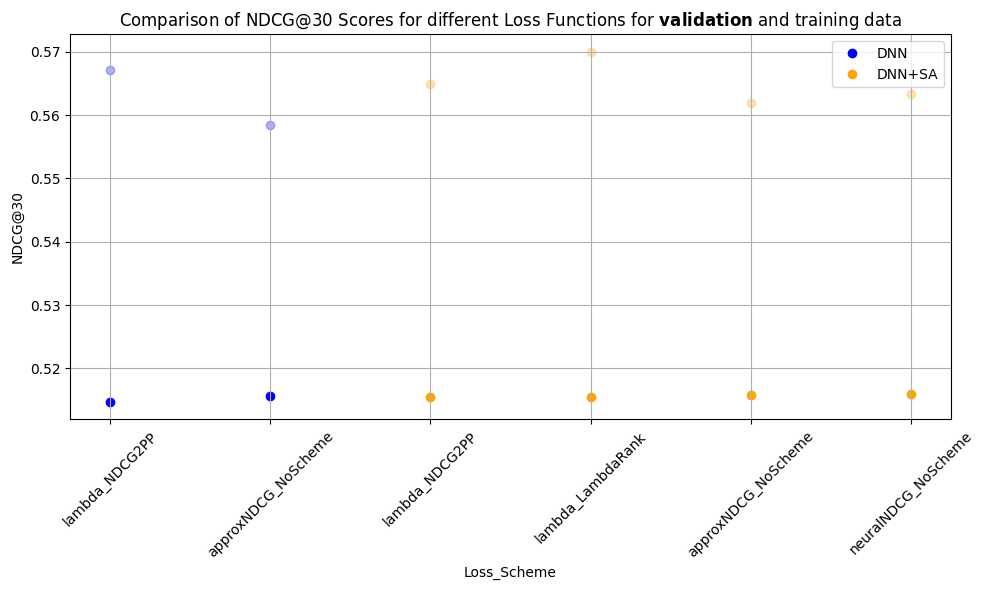

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Provided data
data = {
    'Loss': ['lambda', 'approxNDCG', 'lambda', 'lambda', 'approxNDCG', 'neuralNDCG'],
    'Scheme': ['NDCG2PP', 'NoScheme', 'NDCG2PP', 'LambdaRank', 'NoScheme', 'NoScheme'],
    'Model': ['DNN', 'DNN', 'DNN+SA', 'DNN+SA', 'DNN+SA', 'DNN+SA'],
    'ndcg@30': [0.5147, 0.5157, 0.5155, 0.5155, 0.5158, 0.5160],
    'Training_ndcg@30': [0.5671, 0.5585, 0.5649, 0.57, 0.5619, 0.5634]
}

# Create DataFrame
df = pd.DataFrame(data)

# Set 'Loss' and 'Scheme' as separate columns
df['Loss_Scheme'] = df['Loss'] + '_' + df['Scheme']
df.drop(['Loss', 'Scheme'], axis=1, inplace=True)

# Define colors for 'DNN' and 'DNN+SA'
colors = {'DNN': 'blue', 'DNN+SA': 'orange'}

# Plotting
plt.figure(figsize=(10, 6))

# Plot NDCG@30 for all models
for i, row in df.iterrows():
    plt.scatter(i, row['ndcg@30'], color=colors[row['Model']])

# Plot Training NDCG@30
for i, row in df.iterrows():
    plt.scatter(i, row['Training_ndcg@30'], color=colors[row['Model']], alpha=0.3)

plt.xlabel('Loss_Scheme')
plt.ylabel('NDCG@30')
plt.title(r'Comparison of NDCG@30 Scores for different Loss Functions for $\bf{validation}$ and training data')

# Create custom legend
handles = [plt.Line2D([0], [0], marker='o', color=color, label=model, linestyle='') for model, color in colors.items()]
plt.legend(handles=handles)

plt.grid(True)
plt.xticks(df.index, df['Loss_Scheme'], rotation=45)
plt.tight_layout()
plt.gca().set_facecolor('white')
plt.show()

